For this task we wish to create a model capable of classifying plant data from the Iris dataset :)

In [116]:
from time import time
import numpy as np
import pandas as pd
import seaborn as sns
import graphviz # do conda install python-graphviz
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

First we want to load the dataset, and see what type each of our data and label dimensions is.

In [117]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target 
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

It is also good to see some samples of the data to better understand this.

In [118]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


We should check for any missing values in our data.

In [119]:
df.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target               False
dtype: bool

We can then get some statistical values of the dataset, to see if anything looks unusual. Nothing appears to be particularly unusual, the mean in each dimension is not largely skewed towards the maximum or minimum. The 25%, 50% and 75% quantiles are also not largely skewed in one direction. Without knowing much about what these plant features represent it's hard to say what is expected.

In [120]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


We can then plot each pair of features against each other to get an idea of how this data is distributed, and hence the relationship between these pairs of features. We can pretty much immediately see that class 0 can be seperated from the others purely based on petal width or length. It looks like there may be one outlier belonging to class 0 with uncharactaristically low sepal width and one from class 2 with low sepal length, we will ignore this.

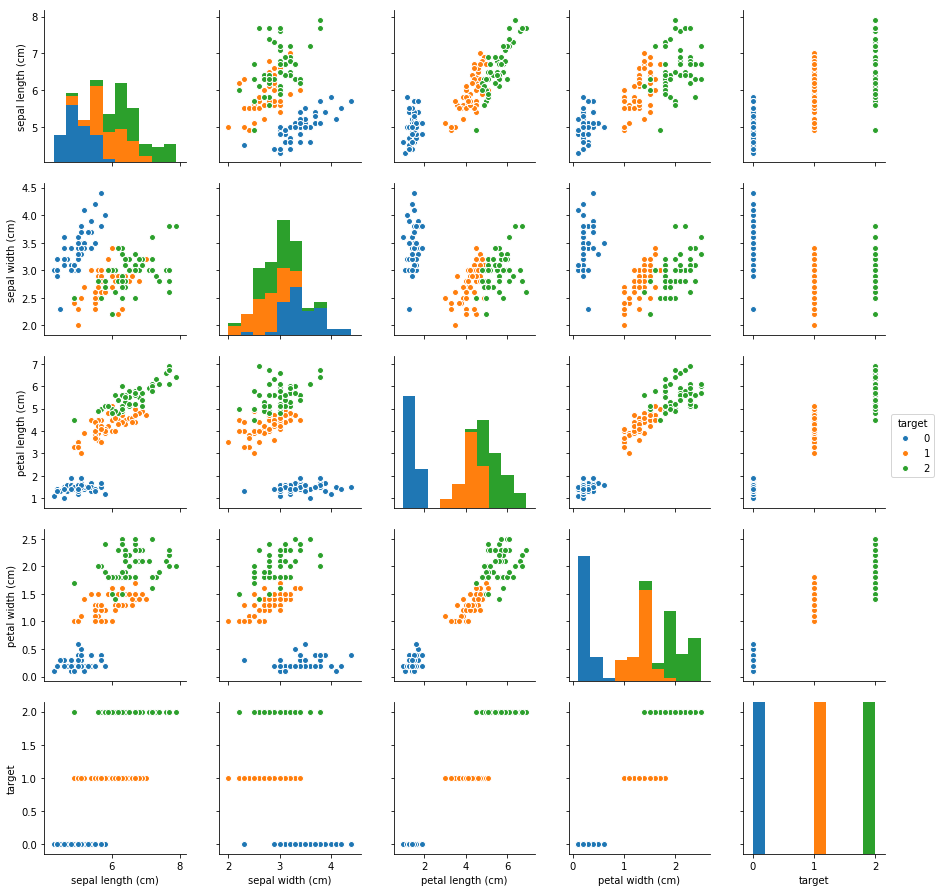

In [121]:
sns.pairplot(df, hue='target')

Now we will split our data into a training and test set.

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(df[iris.feature_names], 
                                                    df['target'], 
                                                    test_size=0.3, 
                                                    random_state=1)


Now we will use some different machine learning methods to get a feel for how to long each model takes to train, how much space it uses and how accurately it performs.

Firstly we will try a simple decision tree.

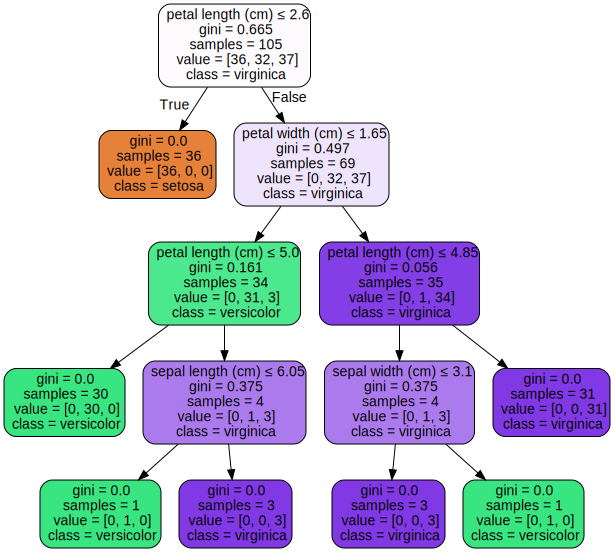

In [123]:
dtc = tree.DecisionTreeClassifier()
t0 = time()
dtc.fit(X_train, Y_train)
t1 = time()

dot_data = tree.export_graphviz(dtc, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [124]:
print('Accuracy:\t{:.4f}'.format(dtc.score(X_test, Y_test)))
print('Training Time:\t{:.4f}'.format(t1-t0))

Accuracy:	0.9556
Training Time:	0.0012


<html>
<body>

This seems like quite a successful method of performing classification for this dataset. Below are some key points about the algorithm.

<ul>
  <li>Balanced decision trees, with n pieces of data with d dimensions have training complexity of dnlog(n).</li>
  <li>Decision trees are easily interpreted.</li>
  <li>Prone to overfitting. If this occurs, pruning should be performed or a random forest should be used.</li>
  <li>Can use entropy or gini index to decide which decision to choose, usually results are identical and gini is faster because no log calculation is required.</li>
  <li>Can also be used for regression.</li>
</ul>

Let's have a go at using KNN for this problem to see if we get any better results. Since it is a small dataset computation time shouldn't be too long.

First we must normalize the data, as KNN uses Euclidean distance as a classifier.

In [125]:
# Normalize by making mean 0 and std 1
df[iris.feature_names] = (df[iris.feature_names] - df[iris.feature_names].mean())/df[iris.feature_names].std()

Now that the data is normalized we will make a train-val-test split of [0.6, 0.2, 0.2]

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(df[iris.feature_names], 
                                                    df['target'], 
                                                    test_size=0.6, 
                                                    random_state=1)
X_val, X_test, Y_val, Y_test = train_test_split(X_test,
                                                Y_test, 
                                                test_size=0.5, 
                                                random_state=1)

In [128]:
max_score = 0
times = []
for neighbors in range(1,21):
    KNN = KNeighborsClassifier(neighbors)
    KNN.fit(X_train, Y_train)
    score = KNN.score(X_val,Y_val)
    if score > max_score:
        opt_neighbors = neighbors
        max_score = score
        best_model = KNN

test_score = best_model.score(X_test, Y_test)

print('optimal neighbors:\t{:}'.format(opt_neighbors))
print('validation score:\t{:.4f}'.format(max_score))
print('test score:\t\t{:.4f}'.format(test_score))

optimal neighbors:	11
validation score:	0.9778
test score:		1.0000


This appears to acheive an excellent result. However this is far from the true story, when trying different random permutations of the data, as low as 0.85 test score is achieved.

<html>
<body>

This seems like quite a naive method of performing classification for this dataset. Below are some key points about the algorithm.

<ul>
  <li>Very little training time if not none, testing complexity of O(nd), VERY time consuming.</li>
  <li>Stores entire training dataset as the model.</li>
  <li>Makes no prior assumption on form of data distribution (non-parametric).</li>
  <li>Suffers from curse of dimensionality, so may require PCA or similar beforehand.</li>
</ul>